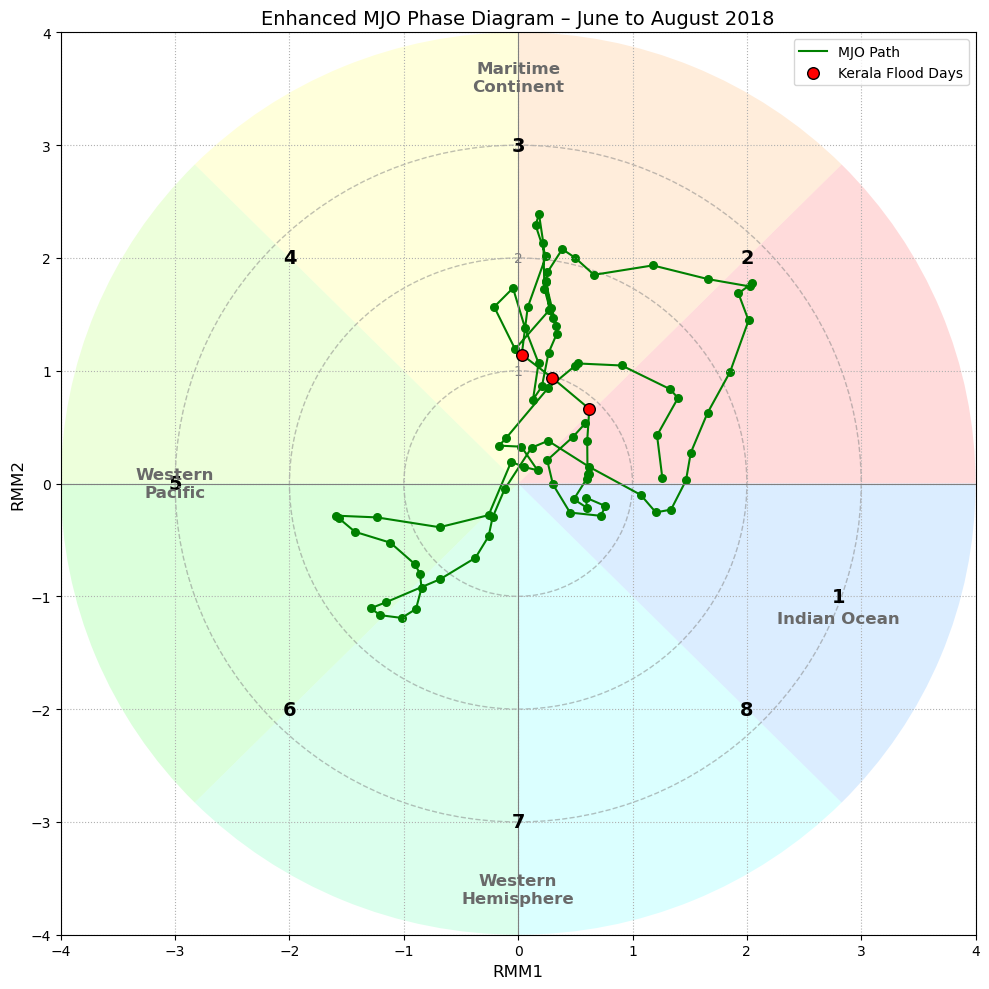

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge

# Load RMM data
file_path = r'C:\Users\SANGETHA\Downloads\Thesis\rmm.74toRealtime.txt'
df = pd.read_csv(file_path, sep=r'\s+', engine='python', skiprows=2,
                  names=['Year', 'Month', 'Day', 'RMM1', 'RMM2', 'Phase', 'Amplitude', 'Comment'])
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Filter for June–August 2018
df_summer = df[(df['Date'] >= '2018-06-01') & (df['Date'] <= '2018-08-31')].reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Brighter phase backgrounds
bg_colors = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99', '#99FFCC', '#99FFFF', '#99CCFF']
for i, color in enumerate(bg_colors):
    wedge = Wedge((0, 0), 4, i*45, (i+1)*45, facecolor=color, alpha=0.35, edgecolor='none')
    ax.add_patch(wedge)

# Amplitude circles
for radius in [1, 2, 3]:
    circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle='--', alpha=0.5)
    ax.add_artist(circle)
    ax.text(0, radius, f'{radius}', color='grey', fontsize=10, ha='center', va='center')

# Plot MJO path (single color for now)
ax.plot(df_summer['RMM1'], df_summer['RMM2'], color='green', linewidth=1.5, label='MJO Path')
ax.scatter(df_summer['RMM1'], df_summer['RMM2'], c='green', s=30)

# Highlight Kerala flood days
flood = df_summer[(df_summer['Date'] >= '2018-08-15') & (df_summer['Date'] <= '2018-08-17')]
ax.scatter(flood['RMM1'], flood['RMM2'], color='red', s=70, edgecolor='black', label='Kerala Flood Days', zorder=5)

# Phase numbers & bigger region names
phases = {1: (2.8, -1), 2: (2, 2), 3: (0, 3), 4: (-2, 2),
          5: (-3, 0), 6: (-2, -2), 7: (0, -3), 8: (2, -2)}
regions = {1: 'Indian Ocean', 3: 'Maritime\nContinent', 5: 'Western\nPacific', 7: 'Western\nHemisphere'}
for num, pos in phases.items():
    ax.text(pos[0], pos[1], str(num), fontsize=14, weight='bold', ha='center', va='center', color='black')
for num, label in regions.items():
    ax.text(phases[num][0], phases[num][1]*1.2, label, fontsize=12, ha='center', va='center', color='dimgray', weight='bold')

# Final touches
ax.set_xlabel('RMM1', fontsize=12)
ax.set_ylabel('RMM2', fontsize=12)
ax.set_title('Enhanced MJO Phase Diagram – June to August 2018', fontsize=14)
ax.axhline(0, color='gray', linewidth=0.8)
ax.axvline(0, color='gray', linewidth=0.8)
ax.grid(True, linestyle=':')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend(loc='upper right', fontsize=10)

# Save high-res
plt.tight_layout()
plt.savefig(r'C:\Users\SANGETHA\Downloads\Thesis\MJO_Phase_Diagram_June_August_Enhanced.png', dpi=300)
plt.show()
